ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by MinMaxScaler.

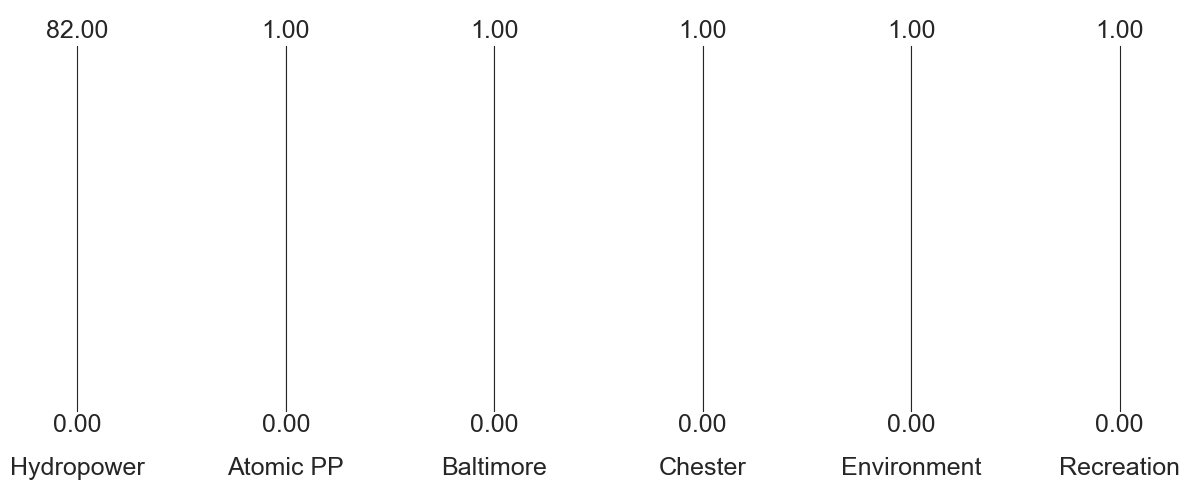

In [3]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt
import rbf_functions

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [12, 5]
sys.path.append("..")

rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

# Load reference set for each RBF
pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = "./refsets/"
    results = pd.read_csv(output_dir + name + "_refset.csv")
    # results["environment"] = 1 - results["environment"]
    pareto_sets[name] = results


plt.show()
limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0, 0, 0, 0, 0, 0]
limits.loc[1] = [82, 1, 1, 1, 1, 1]

labels = {
    "hydropower": "Hydropower",
    "atomicpowerplant": "Atomic PP",
    "baltimore": "Baltimore",
    "chester": "Chester",
    "environment": "Environment",
    "recreation": "Recreation"
}
# Renaming the limits columns as well
limits = limits.rename(columns=labels)


for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):

    v = v.rename(columns=labels)

    axes = ParallelAxes(limits, rot=0, fontsize=18)
    axes.plot(v, label=k, lw=1.5, color=c, alpha=0.045)
    axes.invert_axis("Environment")
    #
    plt.savefig(f"./figs/paper_figures/png/{k}_parcoords_Susquehanna.png")
    plt.savefig(f"./figs/paper_figures/pdf/{k}_parcoords_Susquehanna.pdf")
